# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

random_state = 42
import random
random.seed(random_state)

batch_size = 32
epochs = 500


# Create features and labels
from tensorflow.keras.applications.mobilenet import preprocess_input
import cv2

2024-10-08 14:12:49.760155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 14.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for opencv-python: filename=opencv_python-4.10.0.84-cp311-cp311-macosx_10_15_x86_64.whl size=27280520 sha256=5963f699bd336c70c5a992cf0690f8a7b1334abf5d236e1cdc3ba8b9b2067086
  Stored in directory: /Users/mamatharaj/Library/Caches/pip/wheels/16/15/c8/aaf845de30a73df1a8a672bd9a27f5f2c62f8631fd54034492
Successfully built opencv-python
Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv("Labels.csv")

#### Loading labels csv file to Pandas DF

In [26]:
ylabels = pd.read_csv('Labels.csv')
ylabels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


## Data Overview

### Understand the shape of the dataset

In [17]:
ylabels.shape

(4750, 1)

#### Loading the Images numpy array into a data array

In [6]:
np_load_old = np.load

# # modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle = True, **k)

data = np.load('images.npy')

##### Checking the shape of the Images array

In [12]:
data.shape

(4750, 128, 128, 3)

In [13]:
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


#### Getting all unique different categories into a list

In [14]:
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)
num_categ

12

Observation:

* Total number of plant categories are 12 ie., o/p preds should be 12
* We have a total of 4750 plant images
* Each image is of shape 128 X 128
* As the number of channels is 3, images are in RGB (Red, Blue, Green)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

#### Plant Categories Distribution

/var/folders/_8/gygsnz5n09n9kvs6h09qf02m0000gn/T/ipykernel_54540/281344770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ylabels.iloc[:,-1], order=ylabels['Label'].value_counts().index, palette='Greens_r', legend=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

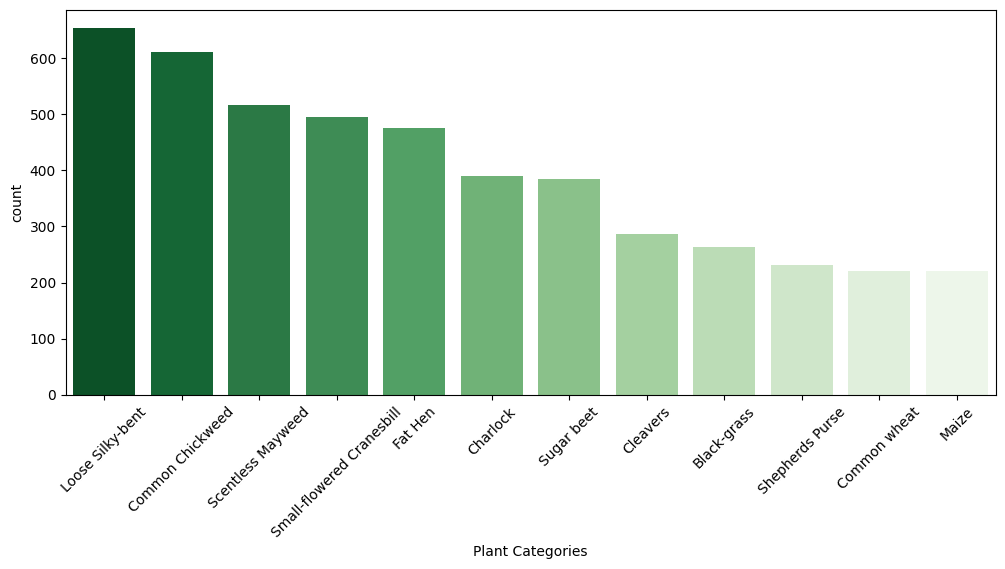

In [20]:
plt.rcParams["figure.figsize"] = (12,5)
#sns.countplot(x=ylabels.iloc[:,-1],order = ylabels['Label'].value_counts().index, palette='Greens_r',legend=False)
sns.countplot(x=ylabels.iloc[:,-1], order=ylabels['Label'].value_counts().index, palette='Greens_r', legend=False)
plt.xlabel('Plant Categories')
plt.xticks(rotation=45)

Observation:

* "Loose Silky bent" plant samples are more compared to other categories
* Least plant samples are for "Common Wheat", "Maize"

#### Plotting differnt plant categories in 12X12 grid

In [21]:
#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid

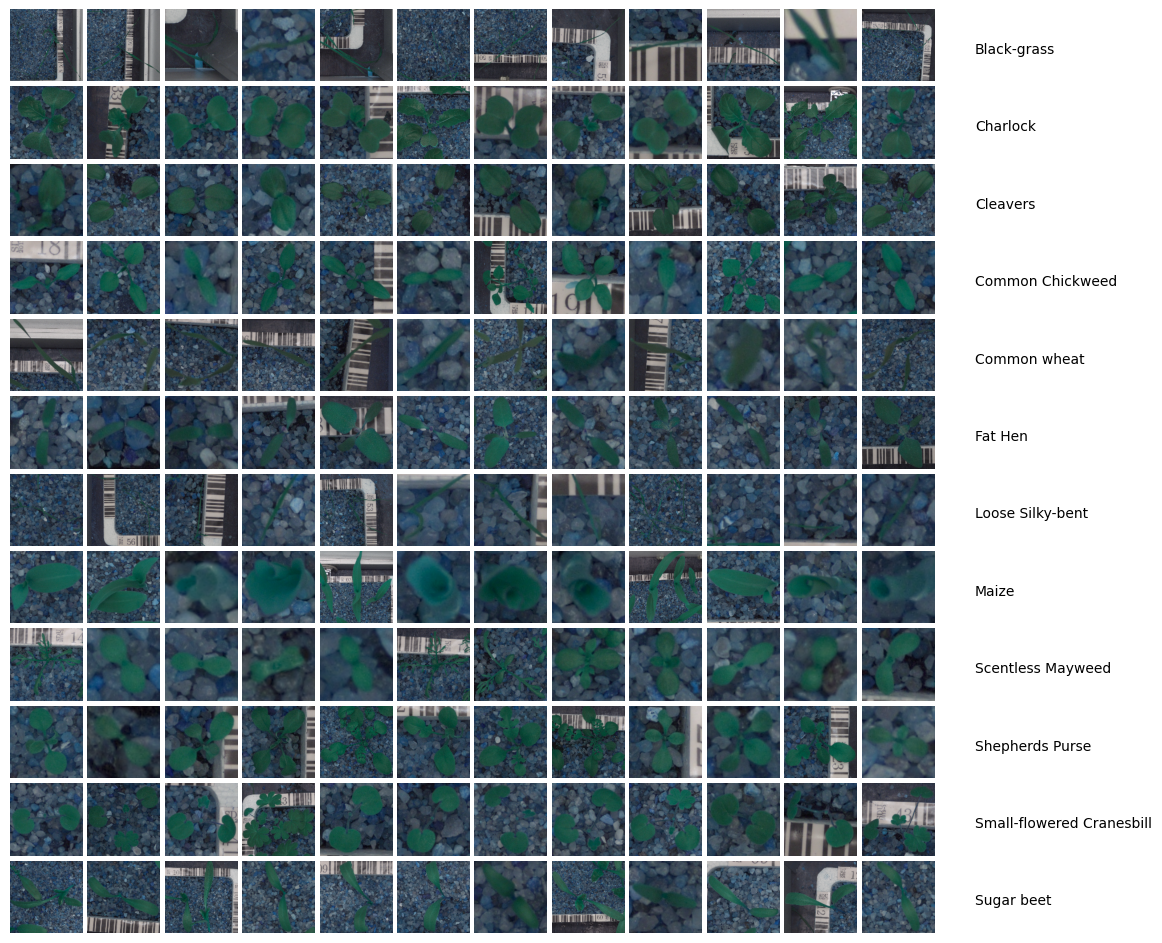

In [22]:
#defining a figure of size 12X12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(data[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();

## Data Pre-Processing

In [2]:
import os
print(os.path.exists('/Users/mamatharaj/Desktop/python/images.npy'))

True


In [3]:
import numpy as np
image = np.load('/Users/mamatharaj/Desktop/python/images.npy')

In [9]:
import cv2
import matplotlib.pyplot as plt

# Attempt to read the image
image = cv2.imread('/Users/mamatharaj/Desktop/python/images.npy')

if image is None:
    print("Error: Could not read the image file. Please check the file path or format.")
else:
    # Convert the image from BGR to RGB (since OpenCV reads in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

Error: Could not read the image file. Please check the file path or format.


### Convert the BGR images to RGB images.

Resize the images
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

#### Resizing and applying Gaussian Blur on a single image and plotting

Resized to 50% and applied Gaussian Blurring with kernel size 3X3


Original Image of size 128X128


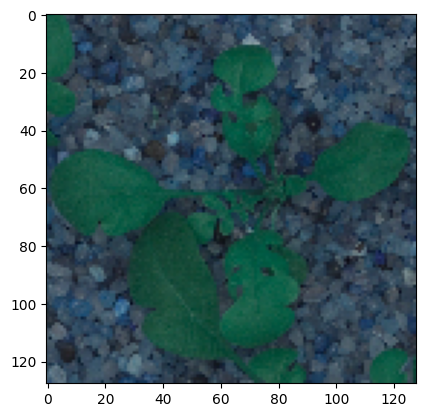

In [10]:
# Resizing the image size to half ie., from 128X128 to 64X64
img = cv2.resize(data[1000],None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img,(3,3),0)

#Displaying preprocessed and original images
print("Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
plt.imshow(img_g)
print('\n')
print("Original Image of size 128X128")
plt.imshow(data[1000])

#### Converting to HSV and applying mask for the background and focusing only on plant

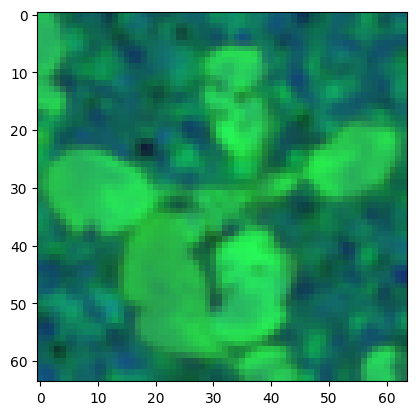

In [11]:
# Convert to HSV image
hsvImg = cv2.cvtColor(img_g, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImg)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

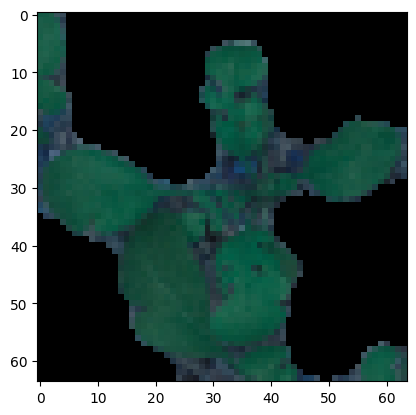

In [12]:
# Create mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create bool mask
bMask = mask > 0  

# Apply the mask
clearImg = np.zeros_like(img, np.uint8)  # Create empty image
clearImg[bMask] = img[bMask]  # Apply boolean mask to the origin image

#Masked Image after removing the background
plt.imshow(clearImg)

#### Applying Resize, Gaussian Blurr and Masking on All Images

In [13]:
data_copy = data.copy()

In [14]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in data:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)  
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  # Create empty image
  clearImg[bMask] = resize_img[bMask]  # Apply boolean mask to the original image
  # clearImg1 = cv2.cvtColor(clearImg,cv2.COLOR_BGR2GRAY)

  preprocessed_data_color.append(clearImg)

#Preprocessed all plant images
preprocessed_data_color = np.asarray(preprocessed_data_color)

#### Visualizing the preprocessed color plant images

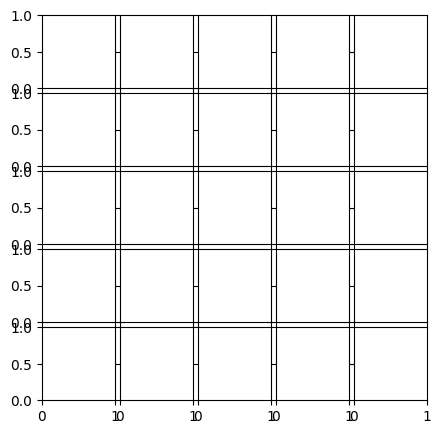

In [34]:
from mpl_toolkits.axes_grid1 import ImageGrid
num_categ = 5

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
categ = ylabels.value_counts()
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(len(plant_indices)):
      ax = grid[i]
      try:  
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
          ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      except IndexError:
          print(f"IndexError: Tried to access index {j} which is out of bounds for plant_indices with length {len(plant_indices)}")
          continue 
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

In [16]:
preprocessed_data_color.shape

(4750, 64, 64, 3)

#### Converting all color images to Grayscale images

In [17]:
preprocessed_data_gs = []
for img in preprocessed_data_color:
  gi = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_data_gs.append(gi)

preprocessed_data_gs = np.asarray(preprocessed_data_gs)

In [18]:
preprocessed_data_gs.shape

(4750, 64, 64)

#### Visualizing the preprocessed Grayscale plant images

In [40]:
# Assuming plant_indices has been defined correctly and contains valid indices
plant_indices = index[condition].tolist()  # Convert condition results into a list of indices

# Loop through the valid indices of plant_indices
for j in range(len(plant_indices)):
    ax = grid[i]
    
    # Check if the index is valid within preprocessed_data_gs
    try:
        if plant_indices[j] < len(preprocessed_data_gs):
            # Display the image with grayscale
            ax.imshow(preprocessed_data_gs[plant_indices[j]], cmap='gray', vmin=0, vmax=255)
        else:
            print(f"Index {plant_indices[j]} is out of bounds for preprocessed_data_gs with length {len(preprocessed_data_gs)}")
    except IndexError:
        print(f"Error: Tried to access index {plant_indices[j]}, but it is out of range.")
    
    # Hide axes for better display
    ax.axis('off')
    i += 1  # Increment the counter for grid layout


In [41]:
print(f"plant_indices: {plant_indices}")
print(f"preprocessed_data_gs length: {len(preprocessed_data_gs)}")

plant_indices: []
preprocessed_data_gs length: 4750


#### Converting Grayscale to Edge images using Sobel and Laplacian

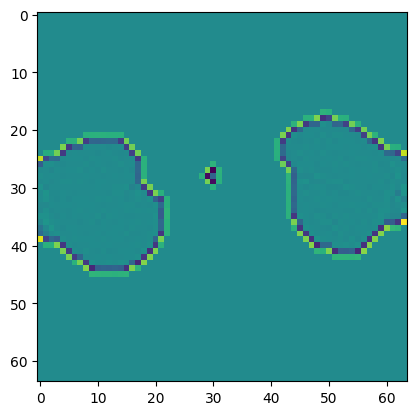

In [43]:
sobel = cv2.Sobel(preprocessed_data_gs[0]*255, cv2.CV_64F,1,1,ksize=3)
laplacian = cv2.Laplacian(preprocessed_data_gs[0]*255, cv2.CV_64F)
plt.imshow(sobel)
print("\n")
plt.imshow(laplacian)

#### Converting all color images to Laplacian Edge detected images

In [44]:
preprocessed_data_Edge_Lap = []
for img in preprocessed_data_gs:
  egi = cv2.Laplacian(img*255, cv2.CV_64F)
  preprocessed_data_Edge_Lap.append(egi)

preprocessed_data_Edge_Lap = np.asarray(preprocessed_data_Edge_Lap)

In [45]:
preprocessed_data_Edge_Lap.shape

(4750, 64, 64)

#### Visualizing the preprocessed Edge plant images

In [47]:
# Assuming plant_indices has been defined correctly and contains valid indices
plant_indices = index[condition].tolist()  # Convert condition results into a list of indices

# Loop through the valid indices of plant_indices
for j in range(len(plant_indices)):
    ax = grid[i]
    
    # Check if the index is valid within preprocessed_data_gs
    try:
        if plant_indices[j] < len(preprocessed_data_gs):
            # Display the image with grayscale
            ax.imshow(preprocessed_data_gs[plant_indices[j]], cmap='gray', vmin=0, vmax=255)
        else:
            print(f"Index {plant_indices[j]} is out of bounds for preprocessed_data_gs with length {len(preprocessed_data_gs)}")
    except IndexError:
        print(f"Error: Tried to access index {plant_indices[j]}, but it is out of range.")
    
    # Hide axes for better display
    ax.axis('off')
    i += 1  # Increment the counter for grid layout

In [48]:
print(f"plant_indices: {plant_indices}")
print(f"preprocessed_data_gs length: {len(preprocessed_data_gs)}")

plant_indices: []
preprocessed_data_gs length: 4750


### Normalization for Images

In [49]:
preprocessed_data_gs = preprocessed_data_gs / 255.
preprocessed_data_color = preprocessed_data_color / 255.
preprocessed_data_Edge_Lap = preprocessed_data_Edge_Lap / 255.

### Label Encoding and One-Hot encoding for Plant categories

In [50]:
ylabels['Label'] = ylabels['Label'].astype('category')
ylabels['Label'] = ylabels['Label'].cat.codes
ylabels.value_counts()

Label
6        654
3        611
8        516
10       496
5        475
1        390
11       385
2        287
0        263
9        231
4        221
7        221
Name: count, dtype: int64

In [51]:
from tensorflow.keras.utils import to_categorical

ylabels = to_categorical(ylabels, num_classes=12)

print("Shape of y_train:", ylabels.shape)
print("One value of y_train:", ylabels[0])

Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Build CNN for preprocessed color Images

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [52]:
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_color, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

### Printing the shapes for all data splits

In [53]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3325, 64, 64, 3)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64, 3)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64, 3)
y_test shape:  (713, 12)
X shape:  (4750, 64, 64, 3)
y shape:  (4750, 12)


Observation:

* X_train has 3325 plant images
* X_val has 712 plant images
* X_test has 713 plant images
* Plan images are in 64X64 shape with color channel

### Reshaping data into shapes compatible with Keras models

In [54]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

### Converting type to float

In [55]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

### Using ImageDataGenerator for common data augmentation techniques

In [58]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )


# test_val_datagen = ImageDataGenerator(rescale = 1./255)

In [59]:
training_set = train_datagen.flow(X_train,y_train,batch_size=32,seed=random_state,shuffle=True)
# val_set = test_val_datagen.flow(X_val,y_val,batch_size=32,seed=random_state,shuffle=True)
# test_set = test_val_datagen.flow(X_test,y_test,batch_size=32,seed=random_state,shuffle=True)

### Importing required libraries for CNN

In [60]:
import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping     # Dense: Just your regular densely-connected NN layer.
from tensorflow.keras import optimizers

### Creating a CNN model containing multiple layers for image processing and dense layer for classification

CNN Model layers:

* Convolutional input layer, 32 feature maps with a size of 3X3 and a * rectifier activation function
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Flatten layer
* Fully connected or Dense layers (with 512 and 128 neurons) with Relu Act.
* Dropout layer to reduce overfitting or for regularization
* O/p layer with Softwax fun. to detect multiple categories

In [62]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Input(shape=(224, 224, 3)))  # Explicitly add the Input layer
model.add(Conv2D(64, (3, 3), activation='relu'))  # No need to pass `input_shape` here anymore
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Using Adam Optimizer and Categorical cross entropy as loss fun. and metrics improvement is Accuracy

In [63]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Printing Model Summary

In [64]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3136)           │        12,544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,744,908 (6.66 MB)

 Trainable params: 1,737,292 (6.63 MB)

 Non-trainable params: 7,616 (29.75 KB)

### EarlyStopping

In [65]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

### Fitting the Classifier for Training set and validating for Validation set

In [66]:
batch_size = 32
epochs = 500

### Model Fitting

In [68]:
model1 = classifier.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True, 
               callbacks = [callback_es])

Epoch 1/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.8592 - loss: 0.3726 - val_accuracy: 0.7570 - val_loss: 0.9859
Epoch 2/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.8341 - loss: 0.4547 - val_accuracy: 0.6475 - val_loss: 1.7994
Epoch 3/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.8603 - loss: 0.3896 - val_accuracy: 0.6699 - val_loss: 1.4500
Epoch 4/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.8675 - loss: 0.3816 - val_accuracy: 0.5028 - val_loss: 3.2155
Epoch 5/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.8685 - loss: 0.3376 - val_accuracy: 0.8244 - val_loss: 0.5662
Epoch 6/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.8751 - loss: 0.3396 - val_accuracy: 0.7486 - val_loss: 0.9509
Epoch 7/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.8749 - loss: 0.3480 - val_accuracy: 0.6980 - val_loss: 0.9601
Epoch 8/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.8728 -

104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9161 - loss: 0.2320 - val_accuracy: 0.7907 - val_loss: 0.7830
Epoch 51/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.9130 - loss: 0.2216 - val_accuracy: 0.5702 - val_loss: 3.0556
Epoch 52/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step - accuracy: 0.9225 - loss: 0.2102 - val_accuracy: 0.8469 - val_loss: 0.5934
Epoch 53/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.9200 - loss: 0.2060 - val_accuracy: 0.8680 - val_loss: 0.4686
Epoch 54/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.9148 - loss: 0.2129 - val_accuracy: 0.5913 - val_loss: 2.3454
Epoch 55/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.9041 - loss: 0.2381 - val_accuracy: 0.6222 - val_loss: 2.8873
Epoch 56/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.9203 - loss: 0.2003 - val_accuracy: 0.8371 - val_loss: 0.8216
Epoch 57/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 25s 240ms/step - accuracy: 0.9198 - loss

### Evaluating on Test data

In [69]:
classifier.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9086 - loss: 0.2381


[0.25991907715797424, 0.9074333906173706]

### Best Model accuracy which has least loss

In [70]:
best_model_accuracy = model1.history['accuracy'][np.argmin(model1.history['loss'])]
best_model_accuracy

0.9242105484008789

Observation:

* Test Accuracy is 91.8%
* Validation model accuracy for least loss is 91.4%

### Printing out the Confusion Matrix

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


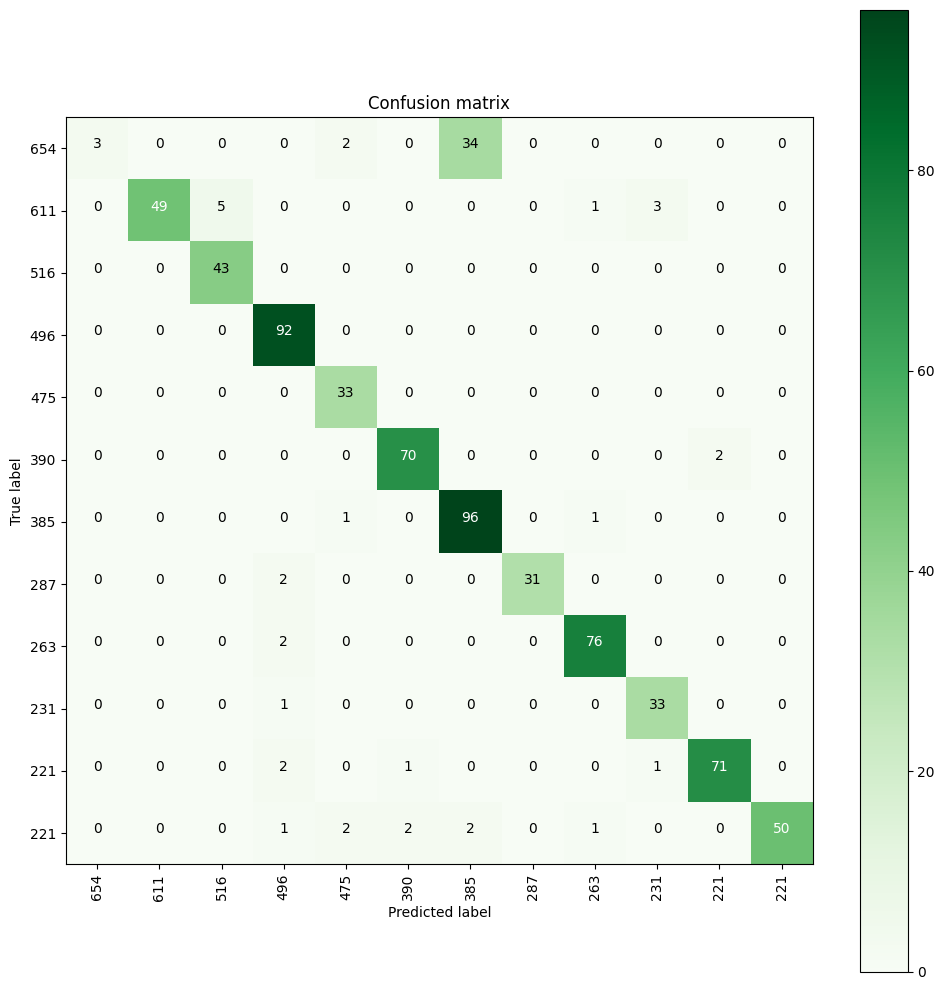

In [71]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = classifier.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ) 

Observation:

* Model have few wrong predictions for 'Losse Silky Bent' and 'black grass' --- 7 and 25

In [72]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.8703230252493802
0.9074333800841514
0.8895545821948558
[0.14285714 0.91588785 0.94505495 0.95833333 0.92957746 0.96551724
 0.83478261 0.96875    0.96815287 0.92957746 0.95945946 0.92592593]


observation:

* Above are the F1 scores based on various averaging methods

In [85]:
print(len(set(trueY)))  # Number of unique labels in the trueY
print(len(set(predYClasses)))  # Number of unique labels in the predictions

12
12


In [86]:
categ = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5',
         'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11']

In [87]:
from sklearn.metrics import classification_report

# Example with 12 class names
categ = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5',
         'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11']

# Generate classification report
print(classification_report(trueY, predYClasses, target_names=categ))

              precision    recall  f1-score   support

     class_0       1.00      0.08      0.14        39
     class_1       1.00      0.84      0.92        58
     class_2       0.90      1.00      0.95        43
     class_3       0.92      1.00      0.96        92
     class_4       0.87      1.00      0.93        33
     class_5       0.96      0.97      0.97        72
     class_6       0.73      0.98      0.83        98
     class_7       1.00      0.94      0.97        33
     class_8       0.96      0.97      0.97        78
     class_9       0.89      0.97      0.93        34
    class_10       0.97      0.95      0.96        75
    class_11       1.00      0.86      0.93        58

    accuracy                           0.91       713
   macro avg       0.93      0.88      0.87       713
weighted avg       0.92      0.91      0.89       713



Observation:

* Recall is very low for Black-grass
* Precison is below .80 for Black grass and Loose Silky Bent
* Even from Confusion matrix, we see model did not perform well for black grass
* Other classes have better balane between precision and recall and a goof f1 score
* Overall Accuracy is also great

In [88]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[674,   0],
        [ 36,   3]],

       [[655,   0],
        [  9,  49]],

       [[665,   5],
        [  0,  43]],

       [[613,   8],
        [  0,  92]],

       [[675,   5],
        [  0,  33]],

       [[638,   3],
        [  2,  70]],

       [[579,  36],
        [  2,  96]],

       [[680,   0],
        [  2,  31]],

       [[632,   3],
        [  2,  76]],

       [[675,   4],
        [  1,  33]],

       [[636,   2],
        [  4,  71]],

       [[655,   0],
        [  8,  50]]])

Each plant category level TP, FP, FN, TN can be seen from above matrix

### Creating a DF for storing model Accuracy and loss

In [89]:
history_df = pd.DataFrame(model1.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.846917,0.396716,0.757023,0.985942
1,0.846917,0.414897,0.647472,1.799399
2,0.857143,0.409484,0.669944,1.450002
3,0.868271,0.381672,0.502809,3.215488
4,0.864361,0.350525,0.824438,0.566183


### Plotting Loss and Accuracy for both Training and Validation sets

<Axes: title={'center': 'Accuracy'}>

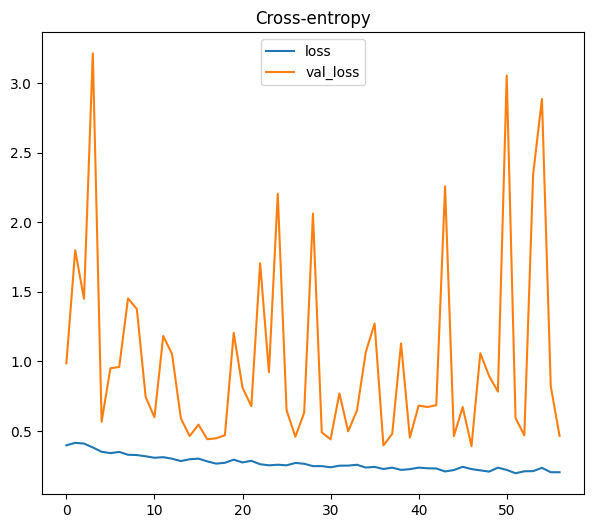

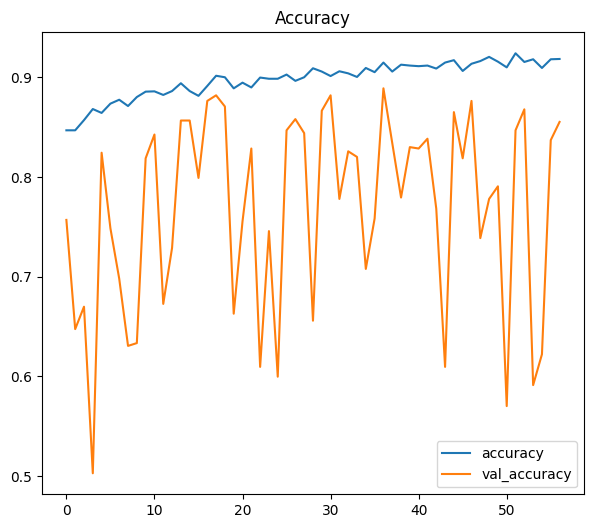

In [90]:
plt.rcParams["figure.figsize"] = (7,6)


history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

Observation:

* Loss is decreasing and val loss is close to training loss
* Accuracy of val set is also close to training accuracy
* No overfitting or underfitting observerd based on the scores of val and testing sets

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

Observation:

* All the above predictions made by model are equal to Actuals

Conclusion:

We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance)

CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

 ### Creating CNN model for Grayscale Images

### Split the dataset into training, testing, and validation set

In [94]:
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_gs, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

#### Printing the shapes for all data splits

In [95]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3325, 64, 64)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64)
y_test shape:  (713, 12)
X shape:  (4750, 64, 64)
y shape:  (4750, 12)


Observation:

* X_train has 3325 plant images
* X_val has 712 plant images
* X_test has 713 plant images
* Plan images are in 64X64 shape with grayscale

### Reshaping data into shapes compatible with Keras models

In [97]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

#### Converting type to float

In [98]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

### Using ImageDataGenerator for common data augmentation techniques

In [100]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )


# test_val_datagen = ImageDataGenerator(rescale = 1./255)

In [101]:
training_set = train_datagen.flow(X_train,y_train,batch_size=batch_size,seed=random_state,shuffle=True)
# val_set = test_val_datagen.flow(X_val,y_val,batch_size=32,seed=random_state,shuffle=True)
# test_set = test_val_datagen.flow(X_test,y_test,batch_size=32,seed=random_state,shuffle=True)

## CNN Model building

In [105]:
# Initialising the CNN classifier1
classifier1 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
classifier1.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
classifier1.add(layers.BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
classifier1.add(layers.BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
classifier1.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier1.add(layers.BatchNormalization())
classifier1.add(Dense(units = 512, activation = 'elu'))

# Adding dropout with probability 0.2
classifier1.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
classifier1.add(layers.BatchNormalization())
classifier1.add(Dense(units = 256, activation = 'elu'))
# classifier1.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier1.add(Dense(units = 12, activation = 'softmax'))

### Printing the Summary

In [106]:
classifier1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 3136)           │        12,544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,811,532 (6.91 MB)

 Trainable params: 1,803,916 (6.88 MB)

 Non-trainable params: 7,616 (29.75 KB)

### Compiling and Fitting the model

In [107]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier1.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.001, restore_best_weights=True)

model2 = classifier1.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True, 
               callbacks = [callback_es])

Epoch 1/500


/Users/mamatharaj/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 25s 211ms/step - accuracy: 0.2758 - loss: 2.5859 - val_accuracy: 0.0604 - val_loss: 12.9358
Epoch 2/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 27s 258ms/step - accuracy: 0.4078 - loss: 1.7709 - val_accuracy: 0.0604 - val_loss: 10.7556
Epoch 3/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.4554 - loss: 1.5772 - val_accuracy: 0.0604 - val_loss: 9.4308
Epoch 4/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 223ms/step - accuracy: 0.4859 - loss: 1.4378 - val_accuracy: 0.0604 - val_loss: 8.8841
Epoch 5/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.5370 - loss: 1.3417 - val_accuracy: 0.0604 - val_loss: 8.3339
Epoch 6/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.5497 - loss: 1.2400 - val_accuracy: 0.0801 - val_loss: 5.5567
Epoch 7/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 227ms/step - accuracy: 0.5876 - loss: 1.1776 - val_accuracy: 0.2879 - val_loss: 2.7909
Epoch 8/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.5862 - loss: 1.1

104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.8153 - loss: 0.4842 - val_accuracy: 0.6924 - val_loss: 0.8717
Epoch 51/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.8166 - loss: 0.4909 - val_accuracy: 0.7360 - val_loss: 0.7432
Epoch 52/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.8125 - loss: 0.4758 - val_accuracy: 0.7500 - val_loss: 0.7862
Epoch 53/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.8219 - loss: 0.4664 - val_accuracy: 0.6756 - val_loss: 0.9801
Epoch 54/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.8179 - loss: 0.4966 - val_accuracy: 0.5506 - val_loss: 2.0064
Epoch 55/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.8262 - loss: 0.5061 - val_accuracy: 0.7739 - val_loss: 0.7331
Epoch 56/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.8056 - loss: 0.5053 - val_accuracy: 0.5112 - val_loss: 2.0504
Epoch 57/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.8176 - loss

104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.8583 - loss: 0.3639 - val_accuracy: 0.5463 - val_loss: 1.8776
Epoch 100/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.8637 - loss: 0.3551 - val_accuracy: 0.6713 - val_loss: 1.1526
Epoch 101/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - accuracy: 0.8610 - loss: 0.3822 - val_accuracy: 0.7739 - val_loss: 0.8018
Epoch 102/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.8618 - loss: 0.3707 - val_accuracy: 0.6938 - val_loss: 0.8012
Epoch 103/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - accuracy: 0.8578 - loss: 0.3704 - val_accuracy: 0.7360 - val_loss: 1.0116
Epoch 104/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.8686 - loss: 0.3380 - val_accuracy: 0.6138 - val_loss: 2.1637
Epoch 105/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 163ms/step - accuracy: 0.8618 - loss: 0.3582 - val_accuracy: 0.7795 - val_loss: 0.8141
Epoch 106/500
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 163ms/step - accuracy: 0.8621

### Evaluating on Test data

In [108]:
classifier1.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8316 - loss: 0.5193


[0.5306646227836609, 0.8218793869018555]

### Best model accuracy from all epochs which has least loss

In [109]:
best_model_accuracy = model2.history['accuracy'][np.argmin(model2.history['loss'])]
best_model_accuracy

0.87037593126297

Observation:

* Test Accuracy is 76%
* Validation model accuracy for least loss is 83%

### Printing out the Confusion Matrix

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


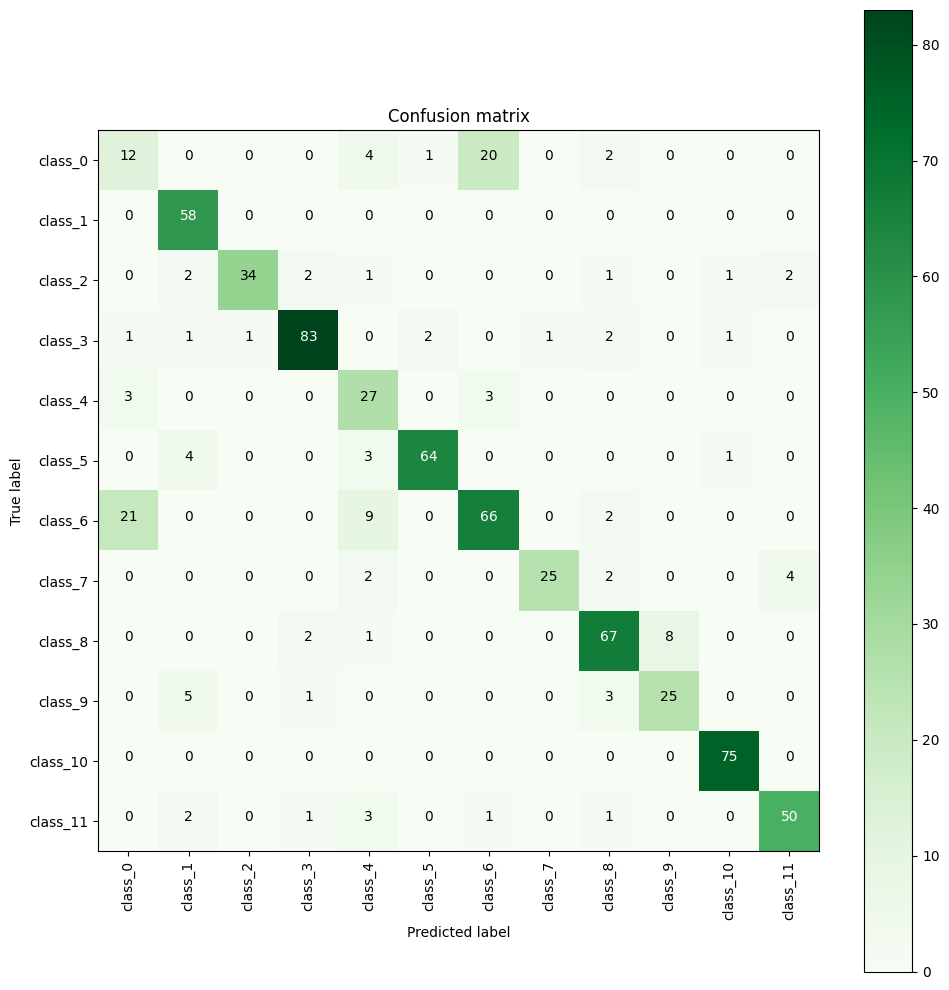

In [110]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = classifier1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ) 


Model did not perform well for:

* Black grass and Loose Silky bent
* Common wheat and loose silky bent
* Shepherds purse and scentless mayweed

### Storing in a DF each epoch's loss and Accuracy for training and validation sets

In [111]:
history_df2 = pd.DataFrame(model2.history)
history_df2.head()

,accuracy,loss,val_accuracy,val_loss
0,0.341053,2.170859,0.060393,12.935807
1,0.418947,1.688183,0.060393,10.755610
2,0.464361,1.538492,0.060393,9.430798
3,0.503759,1.401799,0.060393,8.884094
4,0.533233,1.325682,0.060393,8.333872


### Plotting Loss and Accuracy for training and validation sets

<Axes: title={'center': 'Accuracy'}>

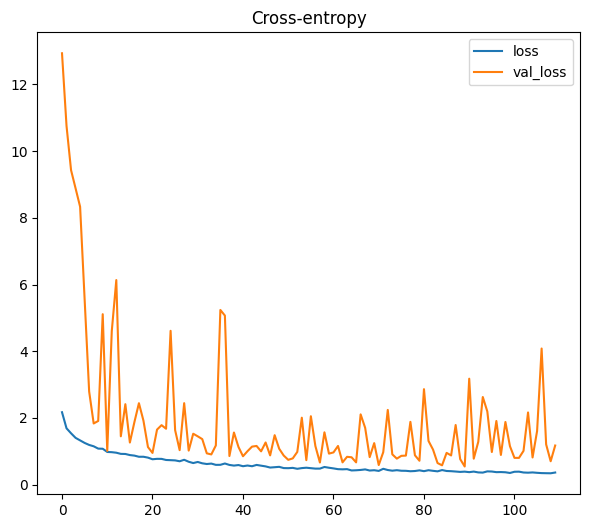

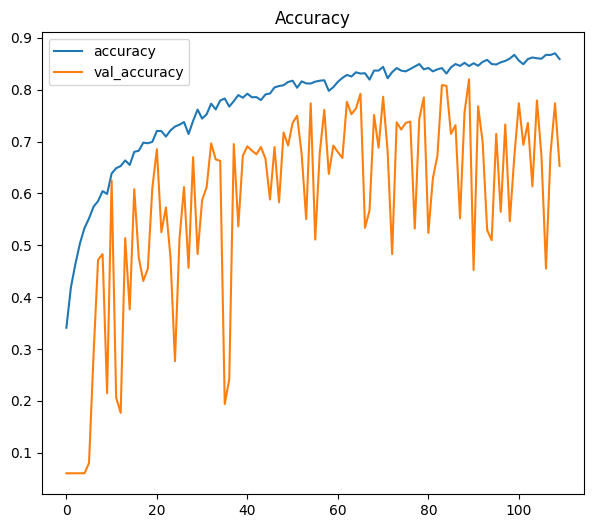

In [112]:
plt.rcParams["figure.figsize"] = (7,6)


history_df2.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df2.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model predicted category for X_test 2 is:  [10]
Actual Category for X_test 2 is:  10
Actual Category Name for X_test 2 is:  class_10


--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model predicted category for X_test 3 is:  [1]
Actual Category for X_test 3 is:  1
Actual Category Name for X_test 3 is:  class_1


--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model predicted category for X_test 33 is:  [7]
Actual Category for X_test 33 is:  7
Actual Category Name for X_test 33 is:  class_7


--------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model predicted category for X_test 36 is:  [6]
Actual Category for X_test 36 is:  6
Actual Category Name for X_test 36 is:  class_6


--------------

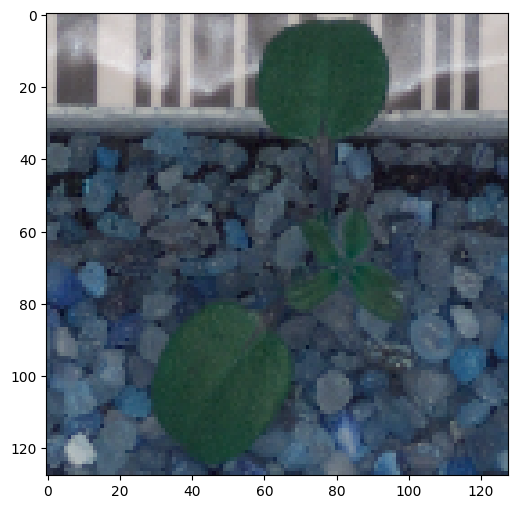

In [113]:
pred_2 = np.argmax(classifier1.predict(np.expand_dims(X_test[2],axis=0)),axis=1)
actual_2 = np.argmax(y_test[2])
print("Model predicted category for X_test 2 is: ", pred_2)
print("Actual Category for X_test 2 is: ",actual_2 )
print("Actual Category Name for X_test 2 is: ",categ[actual_2] )
plt.imshow(X_test[2]*255)
print("\n")
plt.imshow(X_test_color[2])
print("--------------------------------------------------------------------------------------------------")
pred_3 = np.argmax(classifier1.predict(np.expand_dims(X_test[3],axis=0)),axis=1)
actual_3 = np.argmax(y_test[3])
print("Model predicted category for X_test 3 is: ", pred_3)
print("Actual Category for X_test 3 is: ",actual_3 )
print("Actual Category Name for X_test 3 is: ",categ[actual_3] )
plt.imshow(X_test[3]*255)
print("\n")
plt.imshow(X_test_color[3])
print("--------------------------------------------------------------------------------------------------")
pred_33 = np.argmax(classifier1.predict(np.expand_dims(X_test[33],axis=0)),axis=1)
actual_33 = np.argmax(y_test[33])
print("Model predicted category for X_test 33 is: ", pred_33)
print("Actual Category for X_test 33 is: ",actual_33 )
print("Actual Category Name for X_test 33 is: ",categ[actual_33] )
plt.imshow(X_test[33]*255)
print("\n")
plt.imshow(X_test_color[33])
print("--------------------------------------------------------------------------------------------------")
pred_36 = np.argmax(classifier1.predict(np.expand_dims(X_test[36],axis=0)),axis=1)
actual_36 = np.argmax(y_test[36])
print("Model predicted category for X_test 36 is: ", pred_36)
print("Actual Category for X_test 36 is: ",actual_36 )
print("Actual Category Name for X_test 36 is: ",categ[actual_36] )
plt.imshow(X_test[36]*255)
print("\n")
plt.imshow(X_test_color[36])
print("--------------------------------------------------------------------------------------------------")
pred_59 = np.argmax(classifier1.predict(np.expand_dims(X_test[59],axis=0)),axis=1)
actual_59 = np.argmax(y_test[59])
print("Model predicted category for X_test 59 is: ", pred_59)
print("Actual Category for X_test 59 is: ",actual_59 )
print("Actual Category Name for X_test 59 is: ",categ[actual_59] )
plt.imshow(X_test[59]*255)
print("\n")
plt.imshow(X_test_color[59])
print("--------------------------------------------------------------------------------------------------")

#### All above observations are properly predicted by model

## Actionable Insights and Business Recommendations

Conclusion:

* We have built a CNN-model to predict the class of a plant, which works quite well. (Increasing number of epochs and/or adding layers to a model can even increase the performance)

* CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification